In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
lrmod=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [110]:
df=pd.read_csv(r"tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [112]:
# drop the cabin column ,half of the rows are null
df.drop(columns=["Cabin"],inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [114]:
# fill the missing values in the age column using the mean.
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [115]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [116]:
# fill the null in fare with the mean
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())

In [117]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [118]:
# drop irrelevant columns
df.drop(columns=["PassengerId","Name","Ticket"],inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [120]:
# find correlation
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.191382
Pclass,-0.108615,1.000000,-0.440782,0.001087,0.018721,-0.576619
Age,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,0.326800
SibSp,0.099943,0.001087,-0.079535,1.000000,0.306895,0.171488
Parch,0.159120,0.018721,-0.045073,0.306895,1.000000,0.230001
Fare,0.191382,-0.576619,0.326800,0.171488,0.230001,1.000000


In [121]:
# count by sex
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

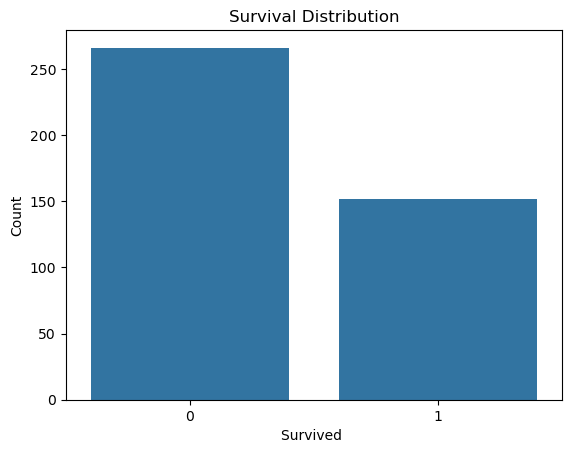

In [122]:
# visualize the survival distribution
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.xlabel('Survived ')
plt.ylabel('Count')
plt.show()




In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [124]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [125]:
# converting categorical columns to numerical 0&1
df.Sex=df.Sex.map({'female':0,'male':1})
df.Embarked=df.Embarked.map({'C':0,'Q':1,'S':2})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [126]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [127]:
# Fearure scaling to standardize the independent features in a fixed range
df.Age=(df.Age-min(df.Age))/(max(df.Age)-min(df.Age))
df.Fare=(df.Fare-min(df.Fare))/(max(df.Fare)-min(df.Fare))
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.636364,0.396975,0.447368,0.392344,0.069540,1.401914
std,0.481622,0.841838,0.481622,0.166617,0.896760,0.981429,0.108993,0.854496
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.301068,0.000000,0.000000,0.015412,1.000000
50%,0.000000,3.000000,1.000000,0.396975,0.000000,0.000000,0.028213,2.000000
75%,1.000000,3.000000,1.000000,0.469207,1.000000,0.000000,0.061484,2.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000,2.000000


In [128]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [129]:
# splitting the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),
                                               df.Survived,
                                               test_size=0.2,
                                               random_state=0,
                                               stratify=df.Survived)

In [130]:
# fit the model
lrmod=LogisticRegression()
lrmod.fit(X_train,y_train)
# prediction
y_predict=lrmod.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

<Axes: >

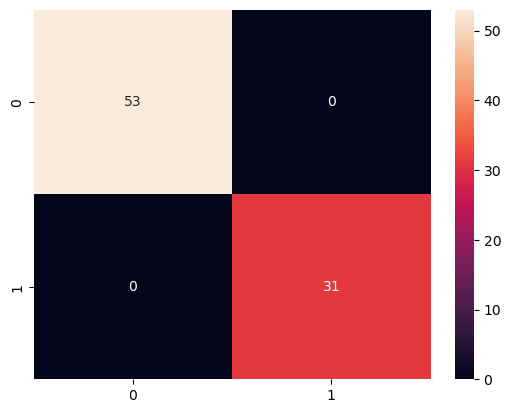

In [131]:
#plot the confusion matrix
cma=confusion_matrix(y_test,y_predict)
sns.heatmap(cma,annot=True)

In [132]:
#fitting the model and prediction
lrmod.fit(X_train,y_train)
prediction=lrmod.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])